In [1]:
import numpy as np
import matplotlib.pyplot as plt
from extrema_detection import find_potential_extrema, pwct, find_corrected_extrema
from onset_offset_detection import find_onsets, find_offsets
from metrics import (find_interbreath_interval,
    find_breathing_rate,
    find_volumes,
    find_tidal_volume,
    find_minute_ventilation,
    find_duty_cycle,
    find_coef_var_breathing_rate,
    find_coef_var_breath_volumes,
    find_coef_var_duty_cycle,
    )
import pandas as pd

Extracting EDF parameters from /Users/rima/Desktop/breathmetrics-python/data/breaths/swiss398_ntx03_0.9dl50_streaming_1-1.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/rima/Desktop/breathmetrics-python/data/breaths/swiss400_ntx03_0.9dl50_streaming_1-1.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/rima/Desktop/breathmetrics-python/data/breaths/swiss401_nacl_streaming_1-1.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


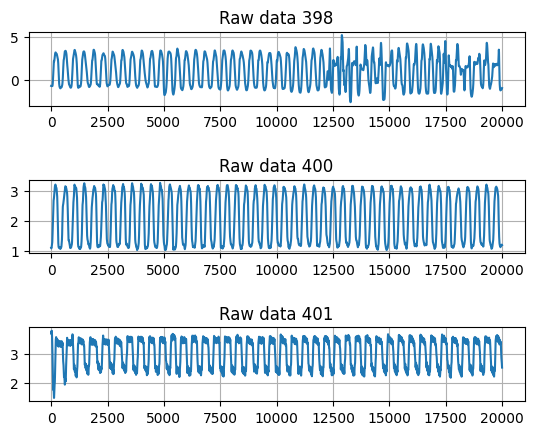

In [2]:
# Signals  extracted from the real data
import mne

file_398 = "./data/breaths/swiss398_ntx03_0.9dl50_streaming_1-1.EDF"
file_400 = "./data/breaths/swiss400_ntx03_0.9dl50_streaming_1-1.EDF"
file_401 = "./data/breaths/swiss401_nacl_streaming_1-1.EDF"

data_398 = mne.io.read_raw_edf(file_398)
data_400 = mne.io.read_raw_edf(file_400)
data_401 = mne.io.read_raw_edf(file_401)

# Data 
raw_data_398 = data_398.get_data()
raw_data_400 = data_400.get_data()
raw_data_401 = data_401.get_data()

# Signal used to perform the detection
y_398 = raw_data_398[0][:20000]
y_400 = raw_data_400[0][:20000]
y_401 = raw_data_401[0][:20000]

# Metadata 
info_398 = data_398.info 
channels_398 = data_398.ch_names
info_400 = data_400.info 
channels_400 = data_400.ch_names
info_401 = data_401.info 
channels_401 = data_401.ch_names

# Plot the data
figure, axis = plt.subplots(3, 1)

axis[0].plot(raw_data_398[0][:20000])
axis[0].set_title("Raw data 398")
axis[0].grid()

axis[1].plot(raw_data_400[0][:20000])
axis[1].set_title("Raw data 400")
axis[1].grid()

axis[2].plot(raw_data_401[0][:20000])
axis[2].set_title("Raw data 401")
axis[2].grid()

plt.subplots_adjust(hspace=1)

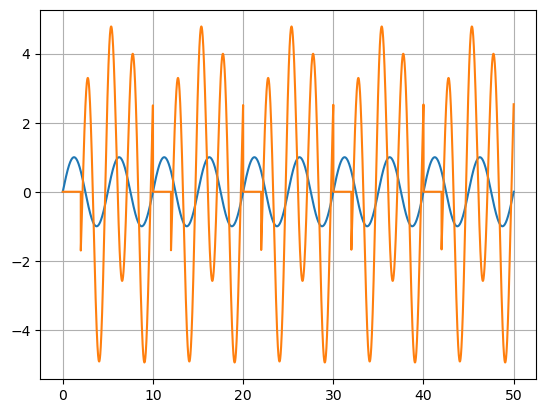

In [3]:
# Test with sinusoidal signal 
duration = 50
fs = 200
f = 0.2
x = np.linspace(0, duration, fs*duration)
y1 = np.sin(2*np.pi*f*x)
_ = plt.plot(x, y1)

# Signal generation with some pauses
y = np.sin(2*np.pi*f*x)+4*np.sin(2*2*np.pi*f*x+np.pi/4)-0.5*np.sin(np.pi*f*x+np.pi/5)

# Introduire des pauses en insérant des valeurs nulles dans le signal
pause_interval = 10  # intervalle entre chaque pause en secondes
pause_length = 2  # durée de chaque pause en secondes
pause_samples = int(pause_length*fs)  # nombre d'échantillons de chaque pause
for i in range(0, int(duration/pause_interval)):
    start_index = i*pause_interval*fs
    end_index = start_index + pause_samples
    y[start_index:end_index] = 0

_ = plt.plot(x, y)
plt.grid()

In [3]:
fs = 200

# Signal 398
peaks_398, troughs_398 = find_potential_extrema(y_398, fs)
peaks_idx_398, troughs_idx_398 = pwct(peaks_398, troughs_398)

# Signal 400
peaks_400, troughs_400 = find_potential_extrema(y_400, fs)
peaks_idx_400, troughs_idx_400 = pwct(peaks_400, troughs_400)

# Signal 401
peaks_401, troughs_401 = find_potential_extrema(y_401, fs)
peaks_idx_401, troughs_idx_401 = pwct(peaks_401, troughs_401)

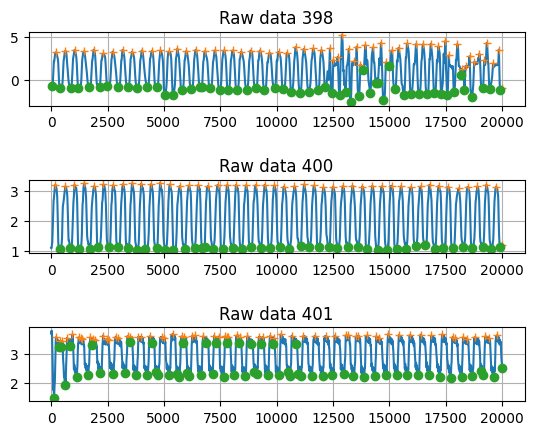

In [4]:
# Plotting the result
figure, axis = plt.subplots(3, 1)

_ = axis[0].plot(y_398)
axis[0].set_title("Raw data 398")
_ = axis[0].plot(peaks_idx_398, y_398[peaks_idx_398], '+')
_ = axis[0].plot(troughs_idx_398, y_398[troughs_idx_398], 'o')
axis[0].grid()

_ = axis[1].plot(y_400)
axis[1].set_title("Raw data 400")
_ = axis[1].plot(peaks_idx_400, y_400[peaks_idx_400], '+')
_ = axis[1].plot(troughs_idx_400, y_400[troughs_idx_400], 'o')
axis[1].grid()

_ = axis[2].plot(y_401)
axis[2].set_title("Raw data 401")
_ = axis[2].plot(peaks_idx_401, y_401[peaks_idx_401], '+')
_ = axis[2].plot(troughs_idx_401, y_401[troughs_idx_401], 'o')
axis[2].grid()

plt.subplots_adjust(hspace=1)
plt.show()

In [5]:
### Corrected_peaks and corrected_troughs

# Signal 398
corrected_peaks_398, corrected_troughs_398 = find_corrected_extrema(y_398, peaks_idx_398, troughs_idx_398)

# Signal 400
corrected_peaks_400, corrected_troughs_400 = find_corrected_extrema(y_400, peaks_idx_400, troughs_idx_400)

# Signal 401
corrected_peaks_401, corrected_troughs_401 = find_corrected_extrema(y_401, peaks_idx_401, troughs_idx_401)

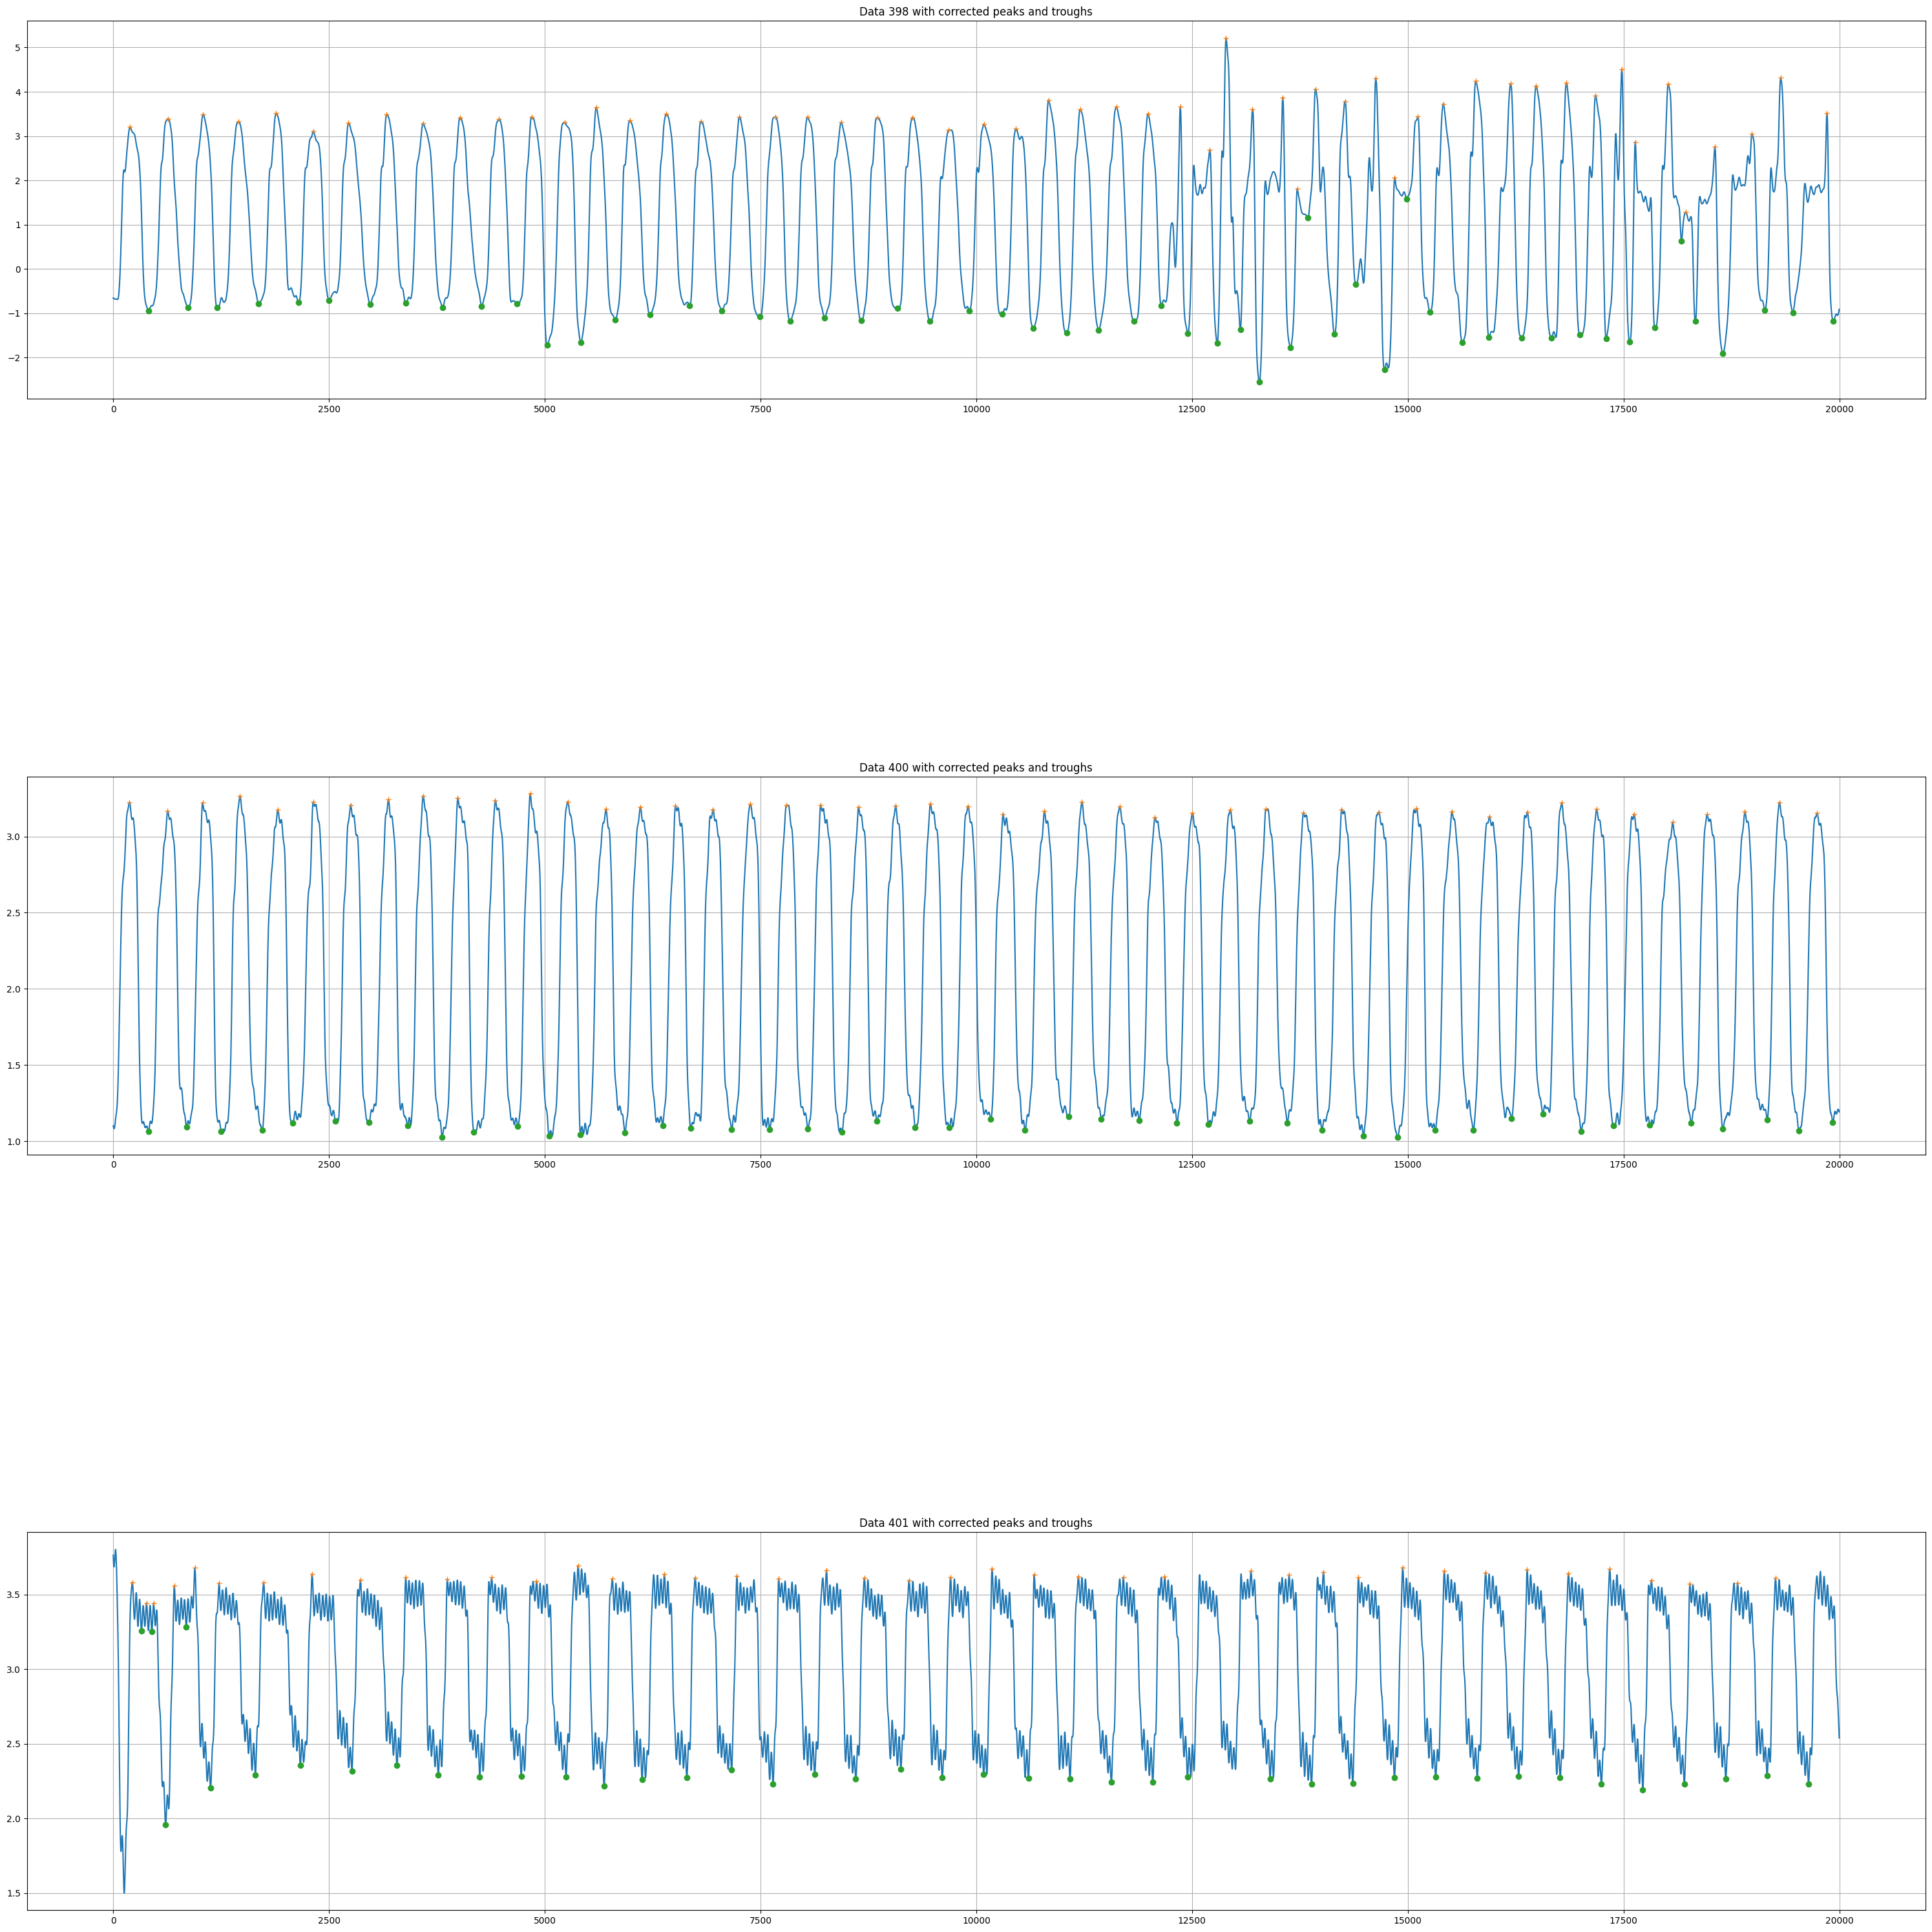

In [6]:
# Plotting the result
figure, axis = plt.subplots(3, 1, figsize=(30, 30))

# Signal 398
axis[0].plot(y_398)
axis[0].set_title("Data 398 with corrected peaks and troughs")
axis[0].plot(corrected_peaks_398, y_398[corrected_peaks_398], '+')
axis[0].plot(corrected_troughs_398, y_398[corrected_troughs_398], 'o')
axis[0].grid()

# Signal 400
axis[1].plot(y_400)
axis[1].set_title("Data 400 with corrected peaks and troughs")
axis[1].plot(corrected_peaks_400, y_400[corrected_peaks_400], '+')
axis[1].plot(corrected_troughs_400, y_400[corrected_troughs_400], 'o')
axis[1].grid()

# Signal 401
axis[2].plot(y_401)
axis[2].set_title("Data 401 with corrected peaks and troughs")
axis[2].plot(corrected_peaks_401, y_401[corrected_peaks_401], '+')
axis[2].plot(corrected_troughs_401, y_401[corrected_troughs_401], 'o')
axis[2].grid()

plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.show()

Shape of peaks_idx_398 :  (62,)
Shape of troughs_idx_398 :  (58,)
Shape of y_398 :  (20000,)
Shape of corrected_peaks_398 :  (55,)
Shape of corrected_troughs_398 :  (55,)
Shape of peaks_idx :  (20,)
Shape of troughs_idx :  (20,)
Shape of y :  (10000,)
Shape of corrected_peaks :  (19,)
Shape of corrected_troughs :  (19,)


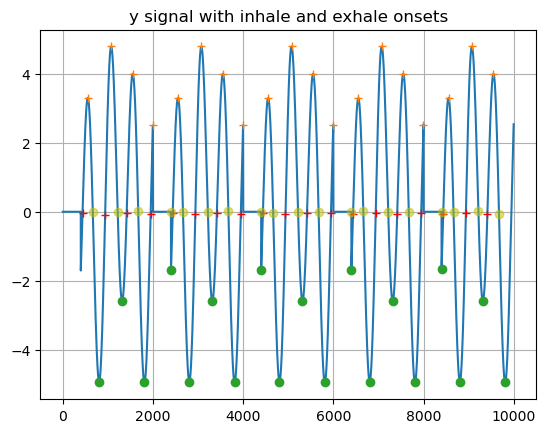

In [8]:
## Debug find_onsets
# Checking of shape 
print('Shape of peaks_idx_398 : ', np.shape(peaks_idx_398))
print('Shape of troughs_idx_398 : ', np.shape(troughs_idx_398))
print('Shape of y_398 : ', np.shape(y_398))
print('Shape of corrected_peaks_398 : ', np.shape(corrected_peaks_398))
print('Shape of corrected_troughs_398 : ', np.shape(corrected_troughs_398))

## Test on y signal 
peaks, troughs = find_potential_extrema(y, fs)
peaks_idx, troughs_idx = pwct(peaks, troughs)
corrected_peaks, corrected_troughs = find_corrected_extrema(y, peaks_idx, troughs_idx)
inhale_onsets, exhale_onsets, inhale_pause_onsets, exhale_pause_onsets = find_onsets(y, np.array(corrected_peaks), np.array(corrected_troughs))

# Checking shape
print('Shape of peaks_idx : ', np.shape(peaks_idx))
print('Shape of troughs_idx : ', np.shape(troughs_idx))
print('Shape of y : ', np.shape(y))
print('Shape of corrected_peaks : ', np.shape(corrected_peaks))
print('Shape of corrected_troughs : ', np.shape(corrected_troughs))

# Plot the y signal
plt.plot(y)
plt.title("y signal with inhale and exhale onsets")
plt.plot(inhale_onsets, y[inhale_onsets], 'r+')
plt.plot(exhale_onsets, y[exhale_onsets], 'yo', alpha = .5)
plt.plot(corrected_peaks, y[corrected_peaks], '+')
plt.plot(corrected_troughs, y[corrected_troughs], 'o')
plt.grid()

In [7]:
# Debug Signal 398
# Making the same size for peaks_idx and troughs_idx
# peaks_idx_398 = peaks_idx_398[0:len(troughs_idx_398)]
# Checking of shape 
print('Shape of peaks_idx_398 : ', np.shape(peaks_idx_398))
print('Shape of troughs_idx_398 : ', np.shape(troughs_idx_398))
print('Shape of y_398 : ', np.shape(y_398))
print('Shape of corrected_peaks_398 : ', np.shape(corrected_peaks_398))
print('Shape of corrected_troughs_398 : ', np.shape(corrected_troughs_398))

inhale_onsets_398, exhale_onsets_398, inhale_pause_onsets_398, exhale_pause_onsets_398 = find_onsets(y_398, np.array(corrected_peaks_398), np.array(corrected_troughs_398))


Shape of peaks_idx_398 :  (62,)
Shape of troughs_idx_398 :  (58,)
Shape of y_398 :  (20000,)
Shape of corrected_peaks_398 :  (55,)
Shape of corrected_troughs_398 :  (55,)
here1
532 nan
here1
328 nan
here1
944 nan
here1
735 nan
here1
1356 nan
here1
1151 nan
here1
1791 nan
here1
1576 nan
here1
2202 nan
here1
1991 nan
here1
2646 nan
here1
2428 nan
here1
3085 nan
here1
2873 nan
here1
3497 nan
here1
3285 nan
here1
3930 nan
here1
3716 nan
here1
4360 nan
here1
4139 nan
here1
4772 nan
here1
4565 nan
here1
5145 nan
here1
4976 nan
here1
5515 nan
here1
5345 nan
here1
5896 nan
here1
5708 nan
here1
6321 nan
here1
6117 nan
here1
6729 nan
here1
6522 nan
here1
7161 nan
here1
6954 nan
here1
7568 nan
here1
7370 nan
here1
7951 nan
here1
7771 nan
here1
8341 nan
here1
8148 nan
here1
8763 nan
here1
8567 nan
here1
9164 nan
here1
8963 nan
here1
9567 nan
here1
9377 nan
here1
9985 nan
here1
9791 nan
here1
10405 nan
here1
10212 nan
here1
10761 nan
here1
10589 nan
here1
11127 nan
here1
10952 nan
here1
11528 nan
h

In [8]:
# Signal 400
inhale_onsets_400, exhale_onsets_400, inhale_pause_onsets_400, exhale_pause_onsets_400 = find_onsets(y_400, np.array(corrected_peaks_400), np.array(corrected_troughs_400))

# Signal 401
inhale_onsets_401, exhale_onsets_401, inhale_pause_onsets_401, exhale_pause_onsets_401 = find_onsets(y_401, np.array(corrected_peaks_401), np.array(corrected_troughs_401))

here1
503 nan
here1
290 nan
here1
958 nan
here1
743 nan
here1
1377 nan
here1
1166 nan
here1
1785 nan
here1
1572 nan
here1
2232 nan
here1
2012 nan
here1
2655 nan
here1
2441 nan
here1
3087 nan
here1
2869 nan
here1
3501 nan
here1
3289 nan
here1
3918 nan
here1
3706 nan
here1
4344 nan
here1
4128 nan
here1
4752 nan
here1
4543 nan
here1
5174 nan
here1
4962 nan
here1
5580 nan
here1
5377 nan
here1
6001 nan
here1
5791 nan
here1
6436 nan
here1
6222 nan
here1
6847 nan
here1
6635 nan
here1
7279 nan
here1
7061 nan
here1
7706 nan
here1
7491 nan
here1
8126 nan
here1
7913 nan
here1
8537 nan
here1
8334 nan
here1
8956 nan
here1
8746 nan
here1
9378 nan
here1
9168 nan
here1
9808 nan
here1
9594 nan
here1
10222 nan
here1
10005 nan
here1
10670 nan
here1
10452 nan
here1
11122 nan
here1
10897 nan
here1
11554 nan
here1
11336 nan
here1
11974 nan
here1
11763 nan
here1
12402 nan
here1
12189 nan
here1
12829 nan
here1
12615 nan
here1
13263 nan
here1
13042 nan
here1
13706 nan
here1
13484 nan
here1
14138 nan
here1
1392

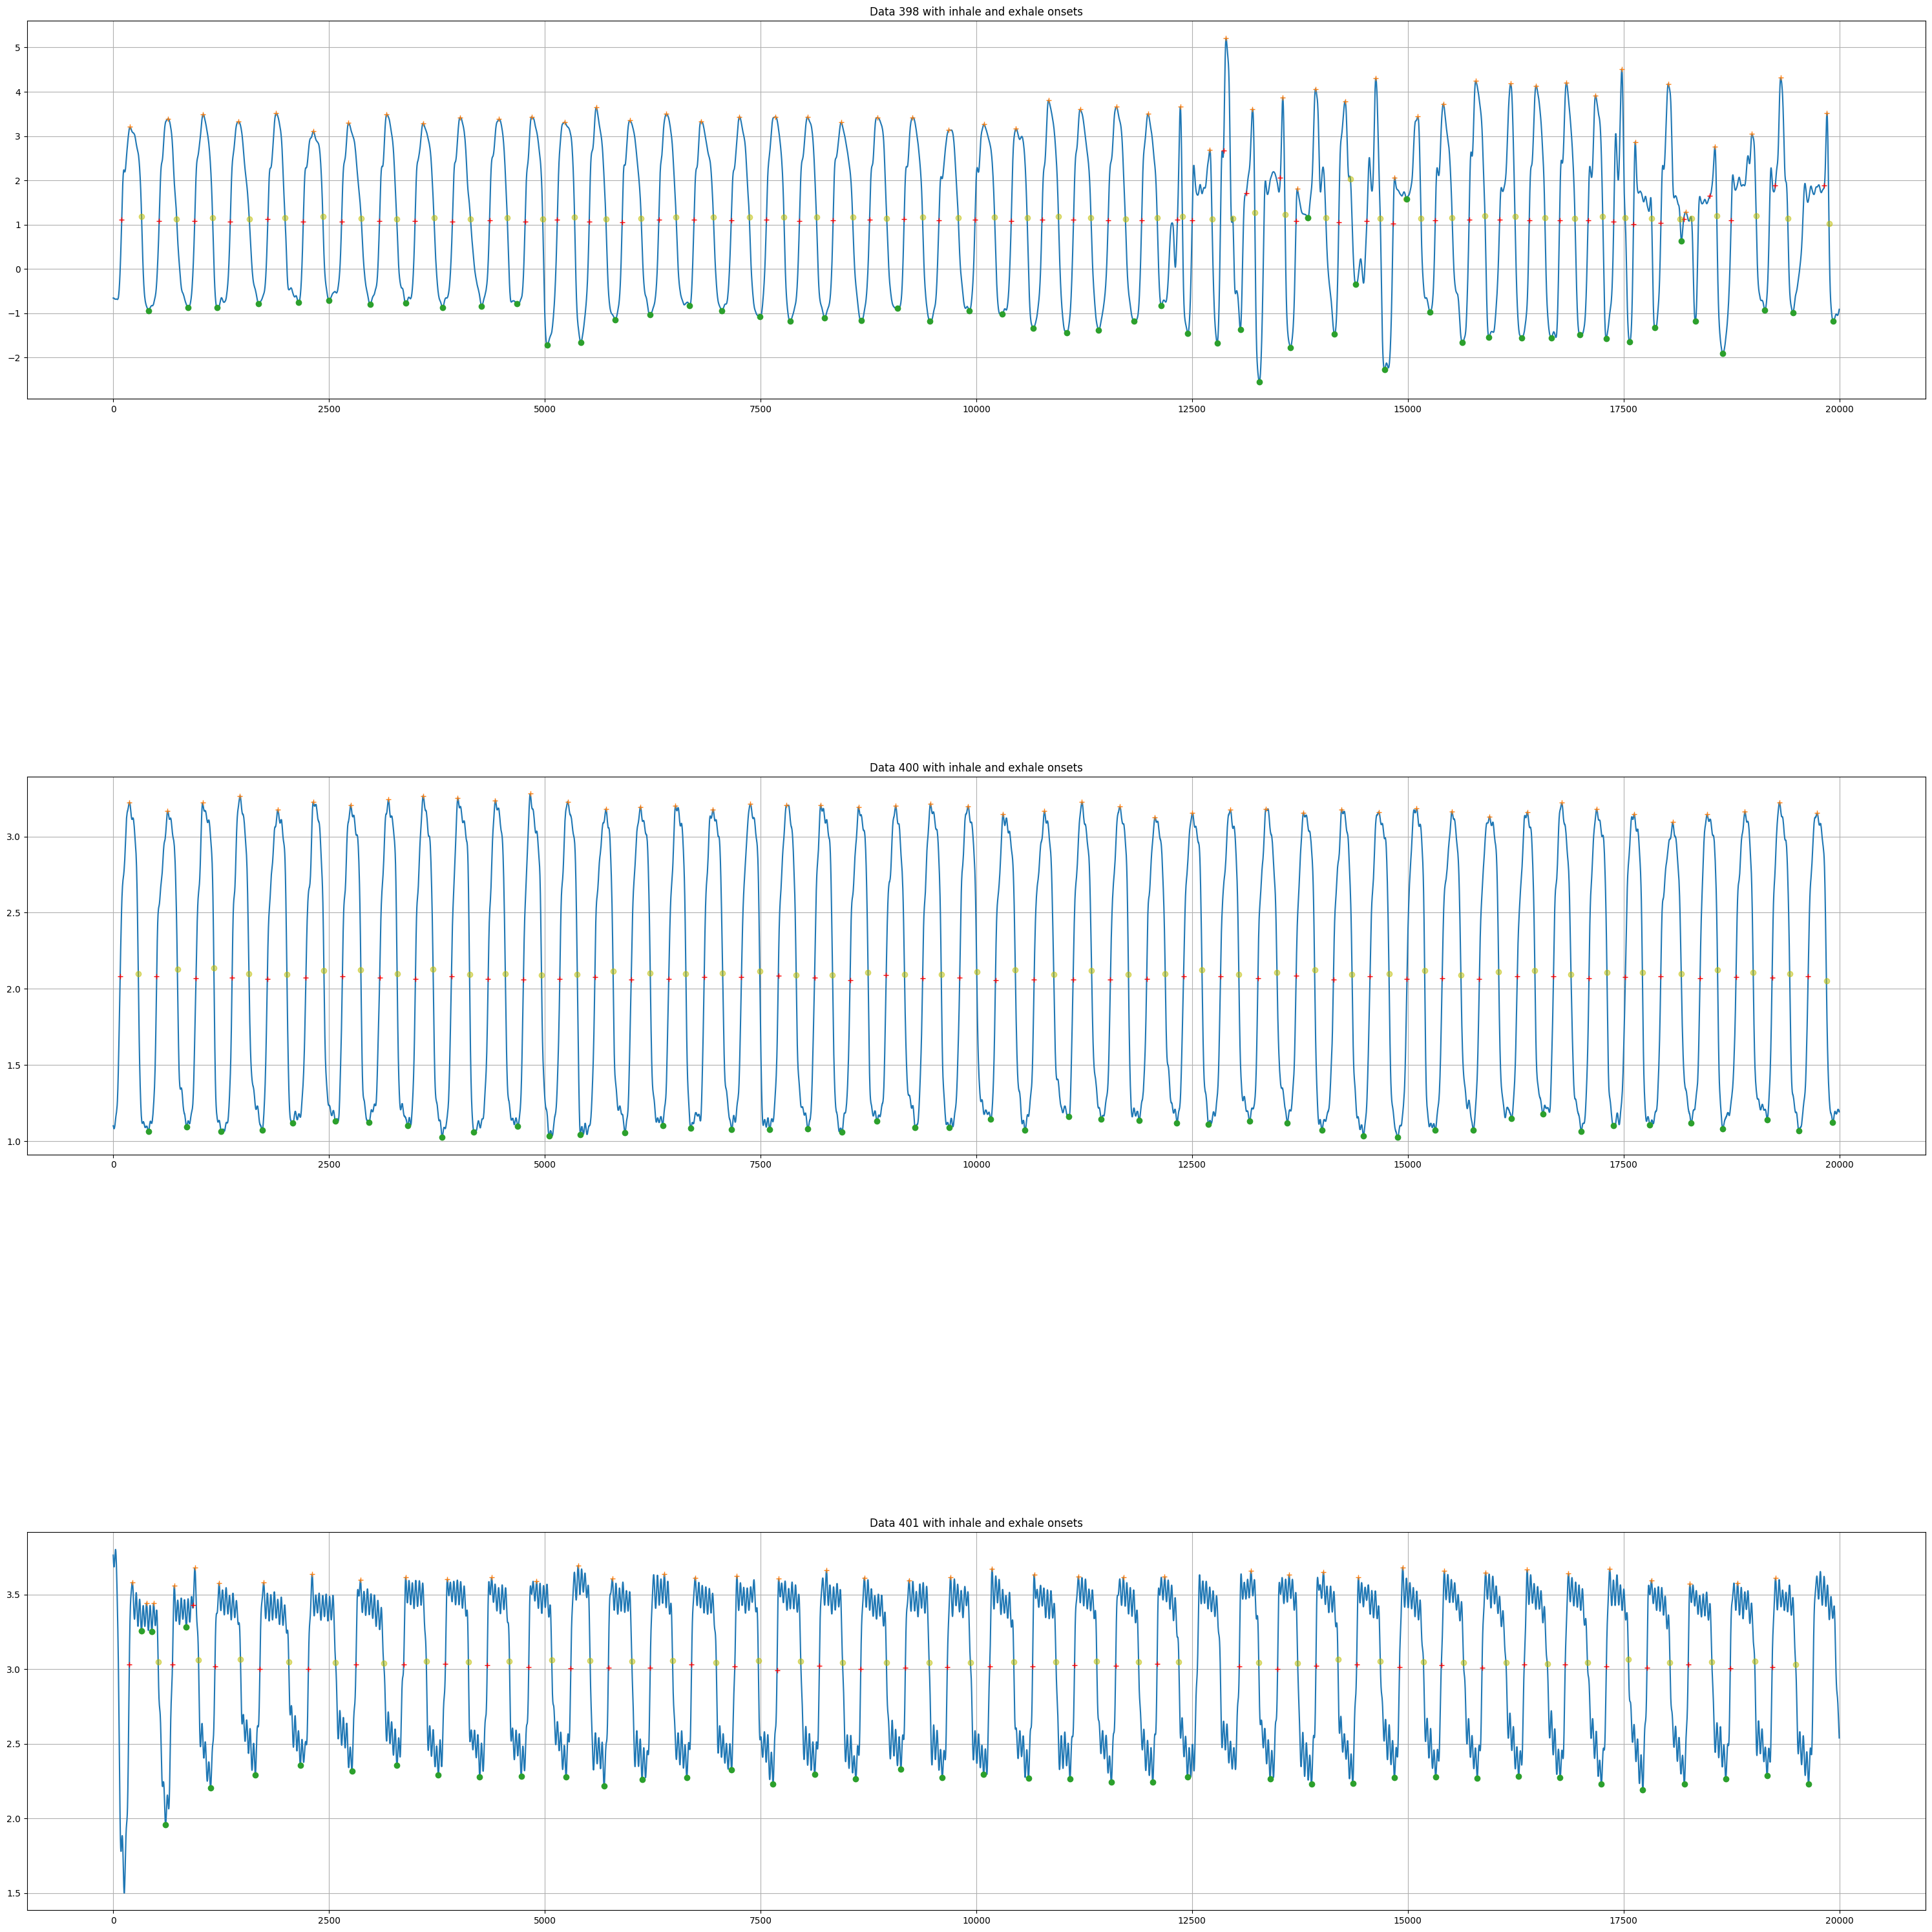

In [14]:
# Plotting the result
figure, axis = plt.subplots(3, 1, figsize=(30, 30))

# Signal 398
axis[0].plot(y_398)
axis[0].set_title("Data 398 with inhale and exhale onsets")
axis[0].plot(inhale_onsets_398, y_398[inhale_onsets_398], 'r+')
axis[0].plot(exhale_onsets_398, y_398[exhale_onsets_398], 'yo', alpha = .5)
axis[0].plot(corrected_peaks_398, y_398[corrected_peaks_398], '+')
axis[0].plot(corrected_troughs_398, y_398[corrected_troughs_398], 'o')
axis[0].grid()

# Signal 400
axis[1].plot(y_400)
axis[1].set_title("Data 400 with inhale and exhale onsets")
axis[1].plot(inhale_onsets_400, y_400[inhale_onsets_400], 'r+')
axis[1].plot(exhale_onsets_400, y_400[exhale_onsets_400], 'yo', alpha = .5)
axis[1].plot(corrected_peaks_400, y_400[corrected_peaks_400], '+')
axis[1].plot(corrected_troughs_400, y_400[corrected_troughs_400], 'o')
axis[1].grid()

# Signal 401
axis[2].plot(y_401)
axis[2].set_title("Data 401 with inhale and exhale onsets")
axis[2].plot(inhale_onsets_401, y_401[inhale_onsets_401], 'r+')
axis[2].plot(exhale_onsets_401, y_401[exhale_onsets_401], 'yo', alpha = .5)
axis[2].plot(corrected_peaks_401, y_401[corrected_peaks_401], '+')
axis[2].plot(corrected_troughs_401, y_401[corrected_troughs_401], 'o')
axis[2].grid()

plt.tight_layout()
plt.subplots_adjust(hspace=1)
plt.show()

In [12]:
inhale_onsets

array([ 438,  939, 1417, 1947, 2438, 2939, 3417, 3947, 4438, 4939, 5417,
       5947, 6437, 6939, 7416, 7947, 8437, 8939, 9416])

In [13]:
samples_between_inhale_onsets = [inhale_onsets[i + 1] - inhale_onsets[i] for i in range(len(inhale_onsets) - 1)]
(np.array(samples_between_inhale_onsets) / fs).mean()

2.4938888888888884

In [14]:
interbreath_interval = find_interbreath_interval(fs, inhale_onsets)
interbreath_interval

2.4938888888888884

In [15]:
breathing_rate = find_breathing_rate(fs, inhale_onsets)
breathing_rate

0.4009801737580754

In [16]:
find_coef_var_breathing_rate(fs, inhale_onsets)

0.03814909275283999

In [17]:
1 / breathing_rate

2.4938888888888884

In [18]:
inhale_offsets, exhale_offsets = find_offsets(y, inhale_onsets, exhale_onsets, inhale_pause_onsets, exhale_pause_onsets)

In [19]:
inhale_volumes, exhale_volumes = find_volumes(y, fs, inhale_onsets, inhale_offsets, exhale_onsets, exhale_offsets )

In [20]:
inhale_volumes

array([2398.05519969, 4165.28710543, 3231.76203174,  339.25146862,
       2398.02848627, 4165.18691086, 3231.73268913,  341.67065152,
       2398.00019954, 4165.06618021, 3231.73975173,  344.16994744,
       2398.19696184, 4165.02809824, 3232.05394807,  346.6664845 ,
       2398.13559563, 4164.90075404, 3232.07102207])

In [21]:
find_coef_var_breath_volumes(inhale_volumes)

0.5105692686569702

In [22]:
tidal_volume = find_tidal_volume(inhale_volumes, exhale_volumes)
tidal_volume

5375.881544710664

In [23]:
find_minute_ventilation(breathing_rate, tidal_volume)

129337.31495405475

In [24]:
find_duty_cycle(fs, inhale_onsets, inhale_offsets, interbreath_interval)

0.5910236718997316

In [25]:
find_coef_var_duty_cycle(fs, inhale_onsets, inhale_offsets)

0.2804729556319838

In [26]:
exhale_offsets

array([ 938., 1416., 1946., 2437., 2938., 3416., 3946., 4437., 4938.,
       5416., 5946., 6436., 6938., 7415., 7946., 8436., 8938., 9415.,
       9947.])

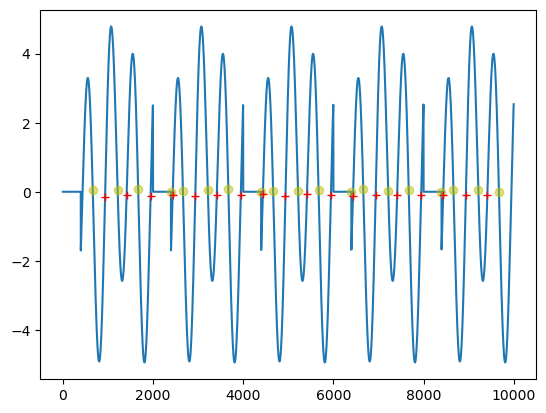

In [27]:
_ = plt.plot(y)
_ = plt.plot(inhale_offsets, y[inhale_offsets.astype(int)], 'yo', alpha = .5)
_ = plt.plot(exhale_offsets[:-1], y[exhale_offsets[:-1].astype(int)], 'r+')

In [28]:
def plot_corrected_vs_potential(signal, 
        potential_peaks, potential_troughs, \
        corrected_peaks, corrected_troughs):
    _ = plt.plot(signal, 'k', alpha = .1, label = 'signal')
    _ = plt.scatter(corrected_peaks, signal[corrected_peaks], marker=8, c='y', label='corrected peaks')
    _ = plt.scatter(corrected_troughs, signal[corrected_troughs], marker=10, c='y', label='corrected troughs')
    _ = plt.scatter(potential_peaks, signal[potential_peaks], marker=9, c='r', label='potential peaks')
    _ = plt.scatter(potential_troughs, signal[potential_troughs], marker=11, c='r', label='potential troughs')
    _ = plt.legend()

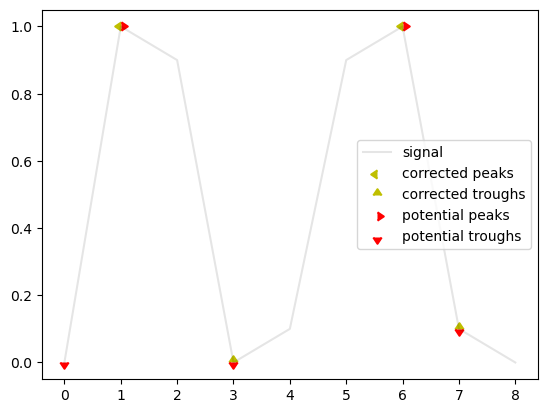

In [29]:
start_with_peak = np.array([0, 1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [1, 6]
potential_troughs = [0, 3, 7]
corrected_peaks, corrected_troughs = find_corrected_extrema(start_with_peak, potential_peaks, potential_troughs)
plot_corrected_vs_potential(start_with_peak, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

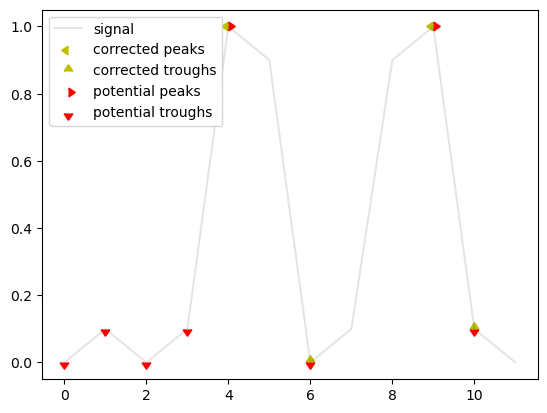

In [30]:
start_with_peak = np.array([0,.1, 0, .1, 1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [4, 9]
potential_troughs = [0, 1, 2, 3, 6, 10]
corrected_peaks, corrected_troughs = find_corrected_extrema(start_with_peak, potential_peaks, potential_troughs)
plot_corrected_vs_potential(start_with_peak, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

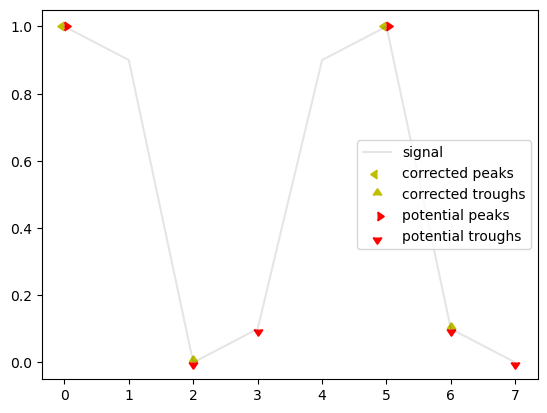

In [31]:
remove_trough = np.array([1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [0, 5]
potential_troughs = [2, 3, 6, 7]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_trough, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_trough, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

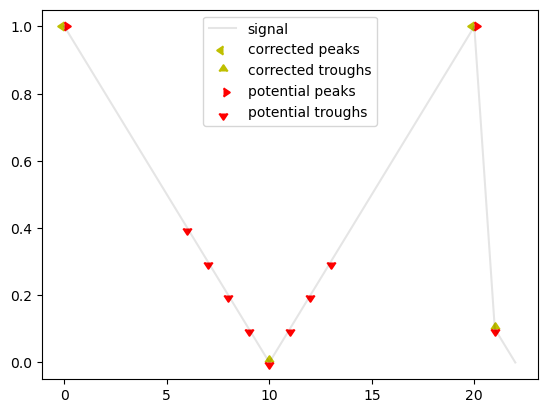

In [32]:
remove_trough = np.array([1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, .1, 0])
potential_peaks = [0, 20]
potential_troughs = [6, 7, 8, 9, 10, 11, 12, 13, 21]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_trough, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_trough, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

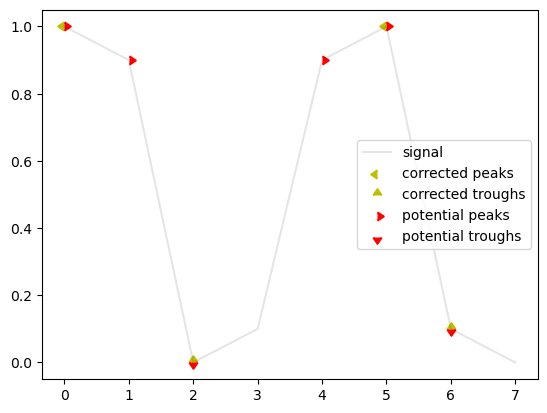

In [33]:
remove_peak = np.array([1, .9, 0, .1, .9, 1, .1, 0])
potential_peaks = [0, 1, 4, 5]
potential_troughs = [2, 6]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_peak, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_peak, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

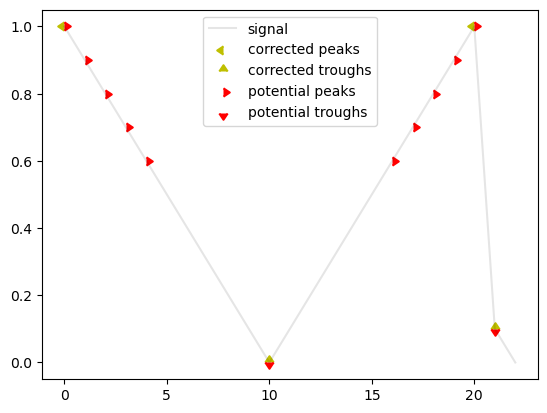

In [34]:
remove_peaks = np.array([1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, .1, 0])
potential_peaks = [0, 1, 2, 3, 4, 16, 17, 18, 19, 20]
potential_troughs = [10, 21]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_peaks, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_peaks, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

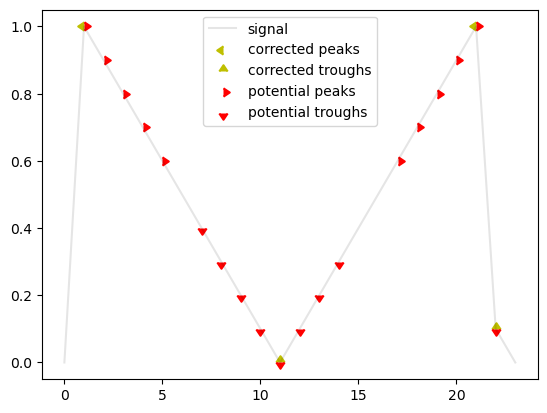

In [35]:
remove_everything = np.array([0, 1, .9, .8, .7, .6, .5, .4, .3, .2, .1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, .1, 0])
potential_peaks = [1,  2,  3,  4,  5, 17, 18, 19, 20, 21]
potential_troughs = [7,  8,  9, 10, 11, 12, 13, 14, 22]
corrected_peaks, corrected_troughs = find_corrected_extrema(remove_everything, potential_peaks, potential_troughs)
plot_corrected_vs_potential(remove_everything, potential_peaks, potential_troughs, corrected_peaks, corrected_troughs)

In [36]:
!python -m unittest

...............
----------------------------------------------------------------------
Ran 15 tests in 0.004s

OK


In [37]:
#!pip install --upgrade numpy==1.21.6

In [38]:
#!pipreqs . --force

In [39]:
!pip install pylint

In [40]:
!pip install 'pylint[spelling]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 1.3 MB/s eta 0:00:00


In [41]:
!pylint ./extrema_detection/_findExtrema.py

************* Module /Users/MelaniePietri/Documents/MVA/Séries Temporelles/breathmetrics-python-main/.pylintrc
.pylintrc:1:0: E0015: Unrecognized option found: module-name-hint, command (unrecognized-option)
************* Module breathmetrics-python-main.extrema_detection._findExtrema
extrema_detection/_findExtrema.py:1:0: C0114: Missing module docstring (missing-module-docstring)
extrema_detection/_findExtrema.py:8:0: C0116: Missing function or method docstring (missing-function-docstring)
extrema_detection/_findExtrema.py:35:0: C0116: Missing function or method docstring (missing-function-docstring)
extrema_detection/_findExtrema.py:55:0: C0116: Missing function or method docstring (missing-function-docstring)
extrema_detection/_findExtrema.py:76:0: C0116: Missing function or method docstring (missing-function-docstring)

-----------------------------------
Your code has been rated at 9.38/10



In [42]:
!black .

Skipping .ipynb files as Jupyter dependencies are not installed.
You can fix this by running ``pip install black[jupyter]``
reformatted demo.py

All done! ✨ 🍰 ✨
1 file reformatted, 11 files left unchanged.


In [43]:
!pylint .

************* Module /Users/MelaniePietri/Documents/MVA/Séries Temporelles/breathmetrics-python-main/.pylintrc
.pylintrc:1:0: E0015: Unrecognized option found: module-name-hint, command (unrecognized-option)
************* Module breathmetrics-python-main
__init__.py:1:0: C0103: Module name "breathmetrics-python-main" doesn't conform to '(([a-z_][A-Za-z0-9_]*)|([A-Z][a-zA-Z0-9]+))$' pattern (invalid-name)


In [44]:
pip install pre-commit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 1.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
